In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("datasetDepurado.csv")
df.head()

,owner_id,title,location,price.guests,total_price.USD,cleaning_fee,service_fee,only_price,reviews,superhost,...,beds,bathrooms,date,datetime,accuracy,communication,cleanliness,locationq,checkin,url
0,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6,0,...,3,3,2019-07-15,2019-07-15 18:29:10,5,5.0,5.0,5.0,5.0,https://www.airbnb.com/rooms/31008582?location...
1,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,0,0,...,2,0,2019-07-15,2019-07-15 18:29:21,NaN,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/33835983?location...
2,29500212,1 Cama: Casa con Piscina y Campo cerca de ciudad.,Santa Rosa,0,0,0,0,15,0,0,...,1,1,2019-07-15,2019-07-15 18:29:35,NaN,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/29500212?location...
3,30006552,2 Camas: Casa con Piscina y Campo cerca de ciu...,Santa Rosa,0,0,0,0,14,1,0,...,2,2,2019-07-15,2019-07-15 18:29:51,NaN,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/30006552?location...
4,8192248,Casa de campo en un bosque de frutas,Torata,0,0,0,0,17,2,0,...,6,3,2019-07-15,2019-07-15 18:30:08,NaN,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/8192248?location=...


In [33]:
# Unión de datasets para obtener densidad poblacional de la ciudad a la que el alojamineto pertenece

# Carga de los datasets auxiliares
provCantonesDf = pd.read_csv("cantonesPorProvincia.csv", encoding="utf-8")
datosProvinciaDf = pd.read_csv("poblacionPorProvincia.csv", encoding="utf-8")

# Pre procesamiento
provCantonesDf["Provincia"] = provCantonesDf["Provincia"].str.title() # Convirtiendo texto de mayúsculas a formato título (primera letra mayúscula)
provCantonesDf["Cantón"] = provCantonesDf["Cantón"].str.title()
provCantonesDf["Región"] = provCantonesDf["Región"].str.title()
datosProvinciaDf["densidad"] = datosProvinciaDf["población"] / datosProvinciaDf["superficie"] # Agregando columna de densidad poblacional de la provincia

# Unión
alojamientosRegionesDf = df.merge(provCantonesDf, left_on="location", right_on="Cantón")
alojamientosPoblaciónDf = alojamientosRegionesDf.merge(datosProvinciaDf, left_on="Provincia", right_on="provincia")
df =  alojamientosPoblaciónDf

In [34]:
df.columns.values

array(['owner_id', 'title', 'location', 'price.guests', 'total_price.USD',
       'cleaning_fee', 'service_fee', 'only_price', 'reviews',
       'superhost', 'guests', 'bedrooms', 'beds', 'bathrooms', 'date',
       'datetime', 'accuracy', 'communication', 'cleanliness',
       'locationq', 'checkin', 'url', 'Región', 'Provincia', 'Cantón',
       'provincia', 'población', 'superficie', 'hogaresInternet',
       'densidad'], dtype=object)

In [38]:
# Identificando las variables numéricas
features = ['only_price','reviews', 'communication', 'cleanliness',
       'locationq', 'checkin', 'densidad']

# Aislando las variables
x = df.loc[:, features]
# Estandarizando las variables
x = StandardScaler().fit_transform(x)

In [39]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,2.199892,-0.874067
1,-1.775116,-0.209163
2,-1.778255,0.670065
3,2.199892,-0.874067
4,-1.775116,-0.209163


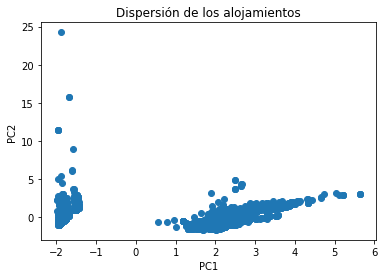

In [40]:
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.title('Dispersión de los alojamientos')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [46]:
#Clustering

kmeans = KMeans(n_clusters=2).fit(principalDf)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.77756051  0.08764458]
 [ 2.40005861 -0.11833753]]


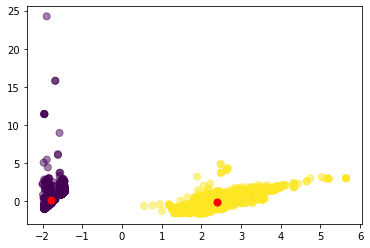

In [47]:

plt.scatter(principalDf['PC1'], principalDf['PC2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

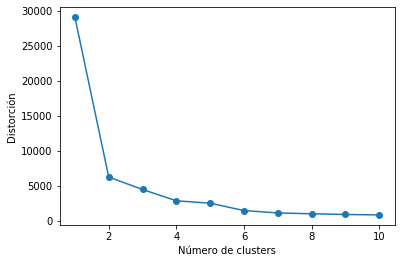

In [49]:
# Metodo del codo
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDf)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.show()